## Generación de semilla

In [1]:
# Función para generar la semilla del laboratorio
def generar_numero_semilla(dni):
    """
    Genera un número semilla de 8 dígitos basado en el número de identidad (DNI).

    Args:
        dni (str): DNI completo, incluyendo la letra al final.

    Returns:
        int: Número semilla compuesto por 8 dígitos como un entero.
    """
    # Definir el mapeo para convertir la letra final a su correspondiente número según la tabla
    letra_a_numero = {
        'T': 0, 'R': 1, 'W': 2, 'A': 3, 'G': 4, 'M': 5, 'Y': 6, 'F': 7,
        'P': 8, 'D': 9, 'X': 10, 'B': 11, 'N': 12, 'J': 13, 'Z': 14, 'S': 15,
        'Q': 16, 'V': 17, 'H': 18, 'L': 19, 'C': 20, 'K': 21, 'E': 22
    }

    # Extraer la parte numérica del DNI
    dni_numerico = ''.join(filter(str.isdigit, dni))

    # Añadir el número correspondiente a la letra final
    letra_final = dni[-1].upper()
    if letra_final in letra_a_numero:
        dni_numerico += str(letra_a_numero[letra_final])

    # Asegurarse de que el DNI tiene al menos 8 dígitos
    while len(dni_numerico) < 8:
        dni_numerico += dni_numerico[:8 - len(dni_numerico)]

    # Obtener los primeros 8 dígitos desde la derecha
    numero_semilla = dni_numerico[-8:]

    # Sustituir dígitos menores que 2 por el número 2
    numero_semilla = ''.join([str(max(int(c), 2)) for c in numero_semilla])

    return int(numero_semilla)
    
dni = "48506658A";
id_lab = generar_numero_semilla(dni);

## Descripción del conjunto de datos
 Descripción del conjunto de datos, aplicando los métodos info, describe, head, tail.

In [3]:
import pandas as pd

# Cargar el archivo Excel
file_path = "ingmaco04_act3_drugs.xlsx"  # El archivo está en el mismo directorio
xls = pd.ExcelFile(file_path)

# Mostrar las hojas disponibles en el archivo
print(xls.sheet_names)

# Cargar la hoja de datos en un DataFrame
df = pd.read_excel(xls, sheet_name='drug200_1')

# Descripción de los datos
print(df.info(), "\n")
print(df.describe(), "\n")
print(df.head(), "\n")
print(df.tail(), "\n")


['drug200_1']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None 

              Age       Na_to_K
count  200.000000    200.000000
mean    44.315000  14901.706900
std     16.544315   8322.843139
min     15.000000      7.340000
25%     31.000000  10053.000000
50%     45.000000  13110.000000
75%     58.000000  19204.500000
max     74.000000  38247.000000 

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH  25355.0  drugY
1   47   M     LOW        HIGH  13093.0  drugC
2   47   M     LOW        HIGH  10114.0  drugC

Se aplica un análisis gráfico de todas las variables (predictoras y respuesta)

Se necesita convertir las variables categóricas en un formato que pueda ser interpretado por los algoritmos de machine learning, como son los árboles de decisión. Vamos a usar el método:

- Codificación con Label Encoding (Codificación de etiquetas)
Se asigna un número entero a cada categoría.
Es útil cuando hay un orden natural en las categorías.
No recomendable si las categorías no tienen un orden jerárquico, aunque para árboles da igual ¿?

In [5]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
for col in ["Sex", "BP", "Cholesterol", "Drug"]:  # Drug si también la necesitas como variable de salida
    df[col] = le.fit_transform(df[col])

# Mostrar el DataFrame transformado
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25355.0,4
1,47,1,1,0,13093.0,2
2,47,1,1,0,10114.0,2
3,28,0,2,0,7798.0,3
4,61,0,1,0,18043.0,4


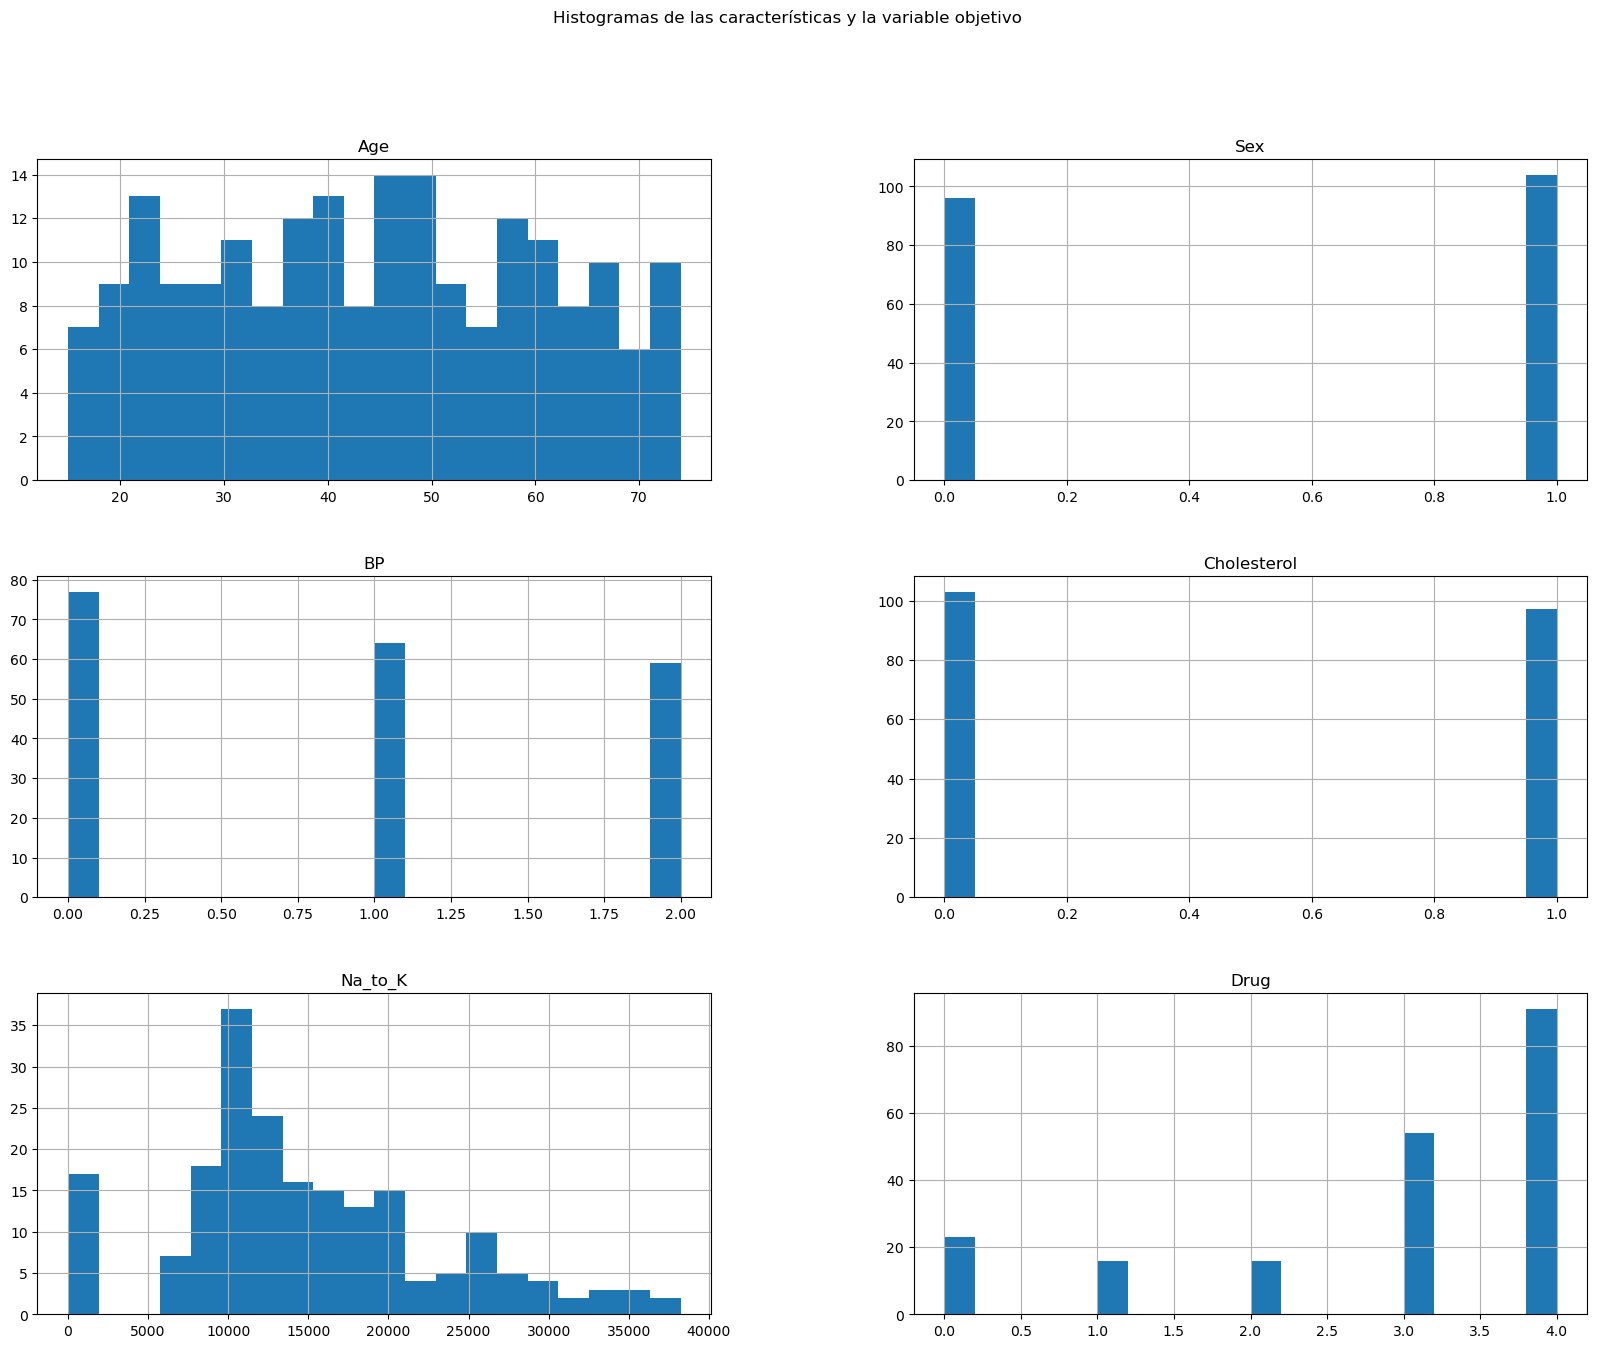

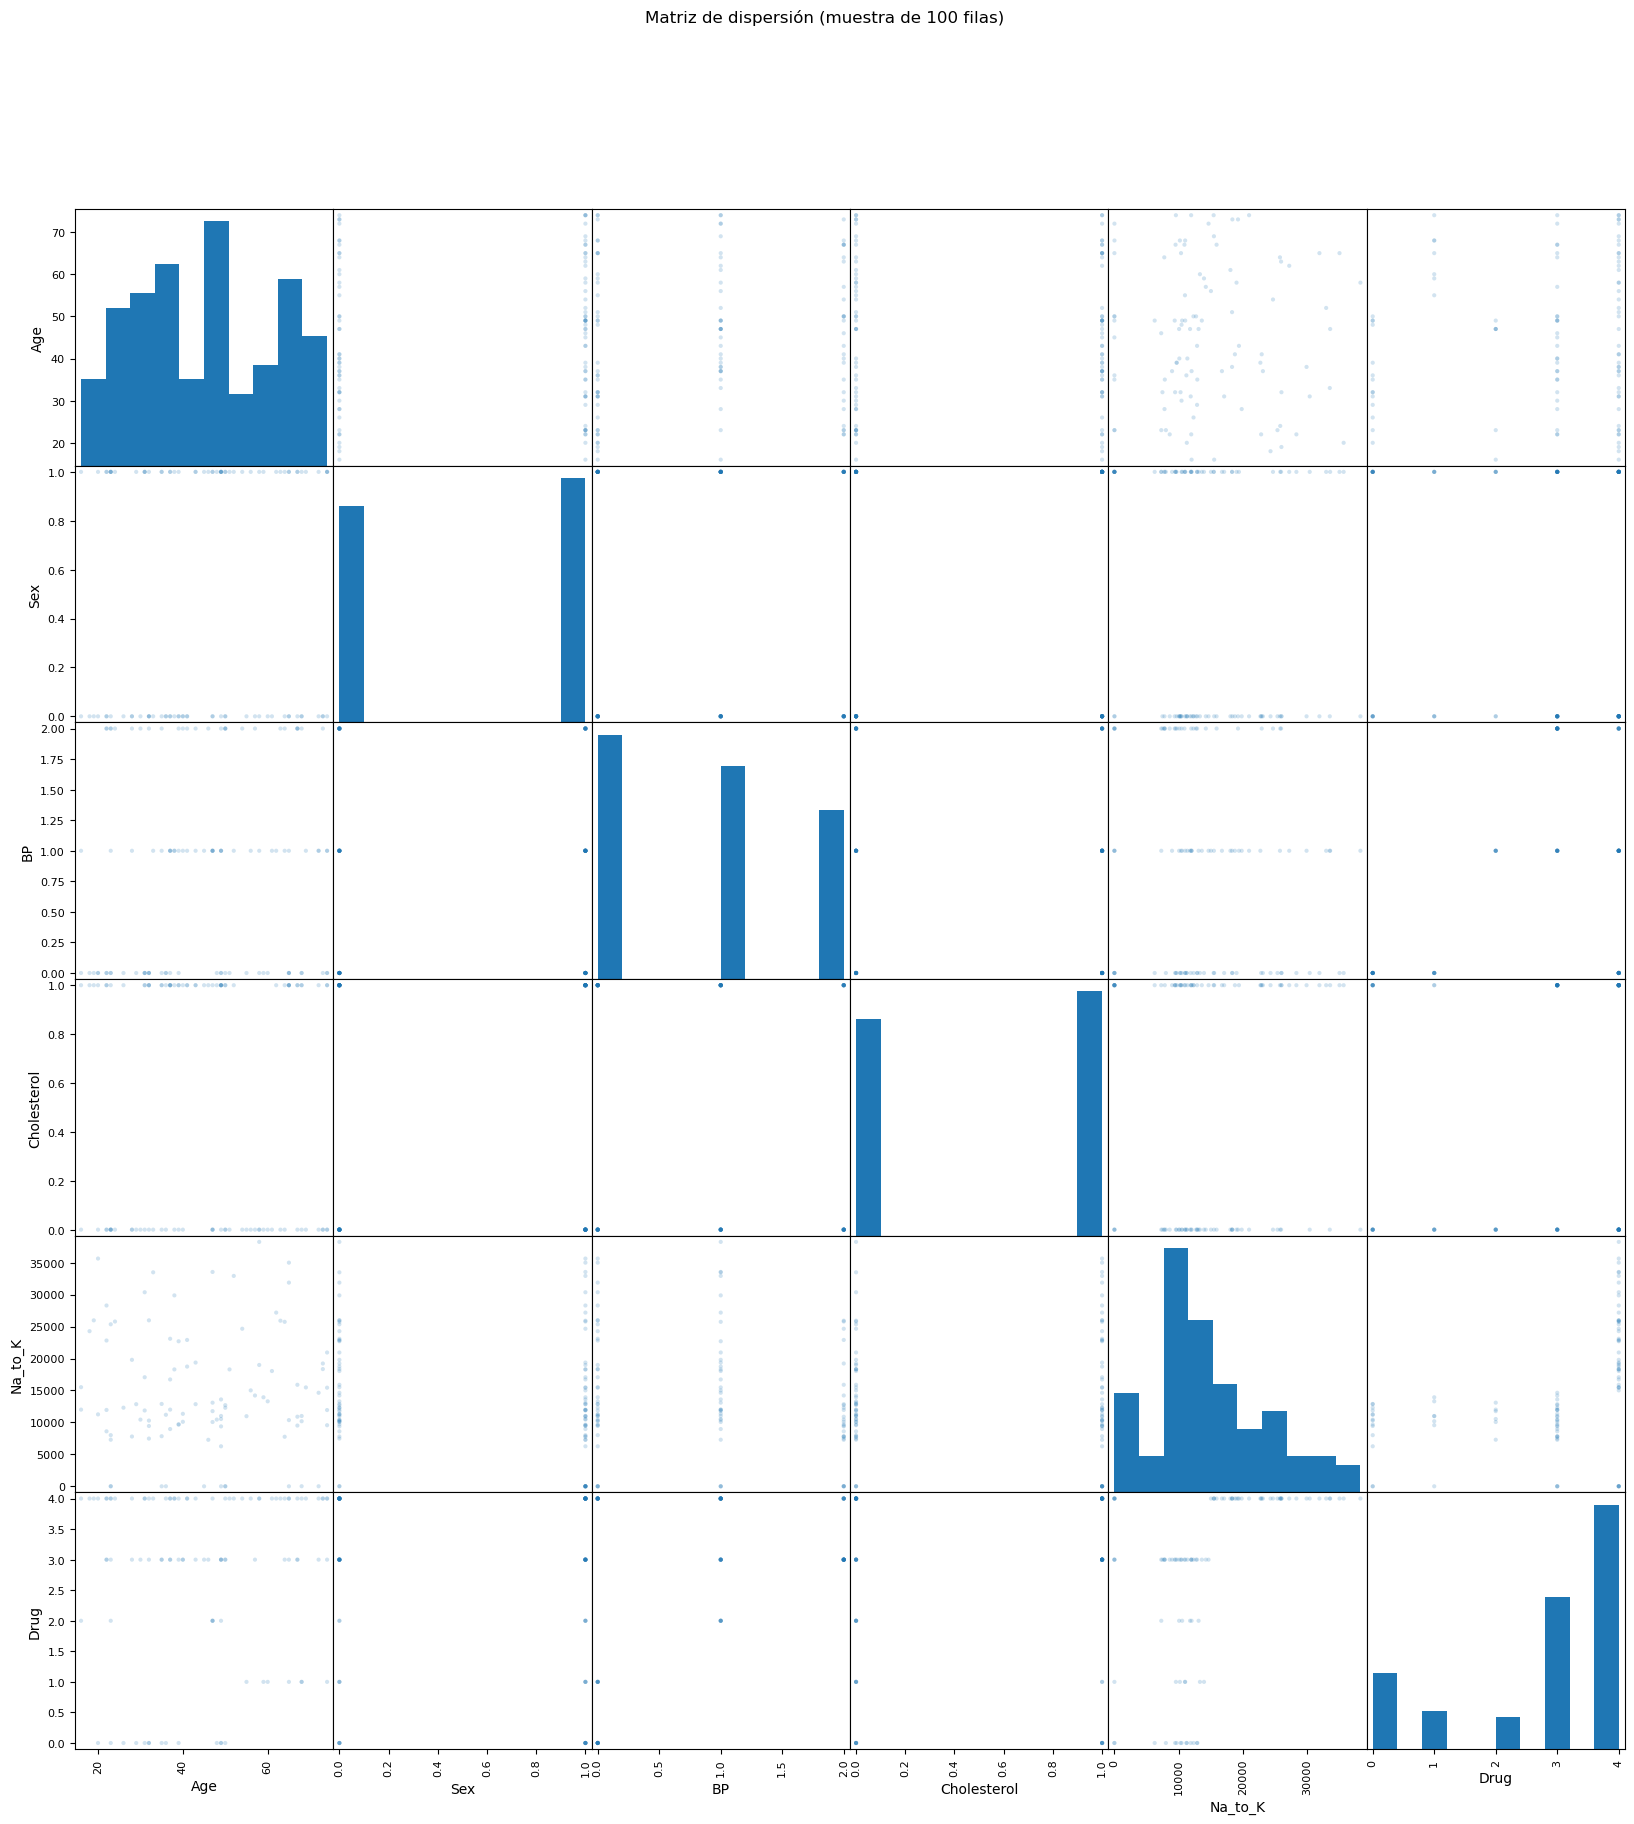

In [7]:
# Análisis gráfico
# Histogramas de las características y la variable objetivo
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogramas de las características y la variable objetivo")
plt.show()

# Matriz de dispersión
pd.plotting.scatter_matrix(df.sample(100, random_state=id_lab), figsize=(20, 20), alpha=0.2)
plt.suptitle("Matriz de dispersión (muestra de 100 filas)")
plt.show()


Divido las variables predictoras (X) de la variable respuesta (y)

In [7]:
# Definir X como las variables predictoras (todas excepto "Drug")
X = df.drop(columns=["Drug"])

# Definir y como la variable objetivo ("Drug")
y = df["Drug"]

# Verificar las dimensiones de X e y
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)

Tamaño de X: (200, 5)
Tamaño de y: (200,)


## Divisón del conjunto de datos. 75% para observaciones y el resto para validar en los distintos métodos.

In [9]:
# definir funcion particiones------------------------------------
import numpy as np
def particiones(dataset, test_part, seed = None):
    test_part_size = int(len(dataset) * test_part)
   
    rng = np.random.default_rng(seed)  # Generador de números aleatorios con semilla
    mezclar_indices = rng.permutation(len(dataset)) # Permutación reproducible
    test_indices = mezclar_indices[:test_part_size]
    train_indices = mezclar_indices[test_part_size:]
    return dataset.iloc[train_indices], dataset.iloc[test_indices]
# usar funcion particiones con train_set 200---------------------
train_set, test_set = particiones(df, 0.25, seed = 2) # Se introduce el porcentaje de las muestras de validación.

# comprobar longitudes de los set de entrenamiento y de test-----
print("Train set (length): ", len(train_set))
print("Test set (length): ", len(test_set))

Train set (length):  150
Test set (length):  50


## Se entrea el árbol con los datos por defecto

In [13]:
from sklearn.tree import DecisionTreeClassifier

# crear el objeto de clase arbol---------------------------------
tree_clf = DecisionTreeClassifier()
#tree_clf = DecisionTreeClassifier(max_depth=2, random_state=3)
# ajustar el arbol-----------------------------------------------
tree_clf.fit(X, y);

Se guarda la figura del árbol

In [15]:

#from graphviz import Source
import os  # No está en el pdf
from sklearn.tree import export_graphviz

# definir donde vamos a guardar la figura------------------------
ROOT_DIR = "."
PATH_FIGURAS = os.path.join(ROOT_DIR, "images")
os.makedirs(PATH_FIGURAS, exist_ok=True)

export_graphviz(
tree_clf,
out_file = os.path.join(PATH_FIGURAS, "arbol_clf_default.dot"),
feature_names = X.columns.tolist(),
class_names = le.inverse_transform(y.unique()).tolist(),
rounded = True,
filled = True
)


In [17]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'images/arbol_clf_default.dot', '-o', 'images/arbol_clf_default.png', '-Gdpi=600'])

0

In [19]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'images/arbol_clf_default.png')

Ahora ponemos la restricción de que la profundidad tenga 3 niveles.

In [27]:
# crear el objeto de clase arbol---------------------------------

tree_clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=3)
# ajustar el arbol-----------------------------------------------
tree_clf_depth3.fit(X, y);

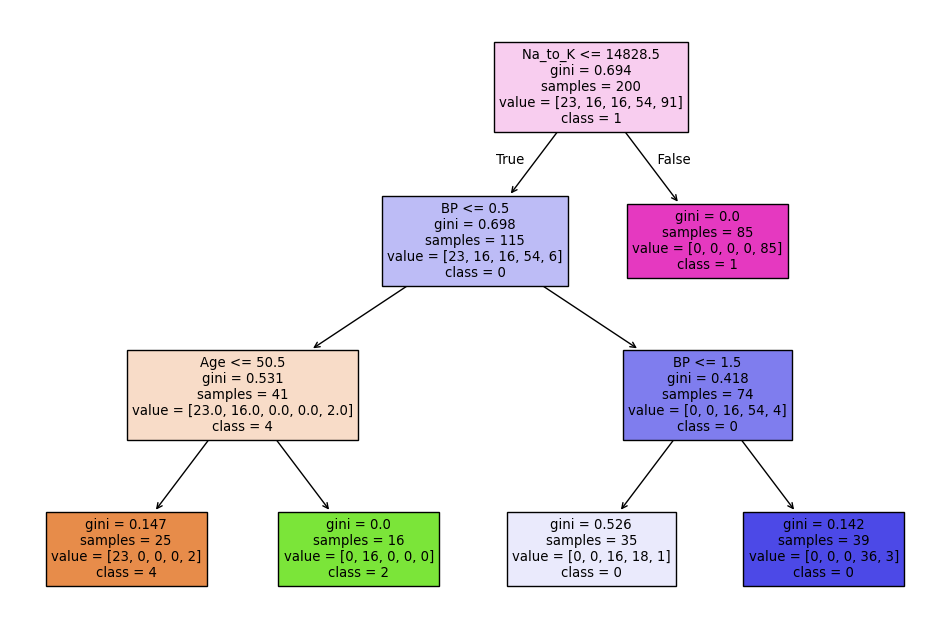

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_clf_depth3, filled=True, feature_names=X.columns.tolist(), class_names=y.unique().astype(str).tolist())
plt.show()


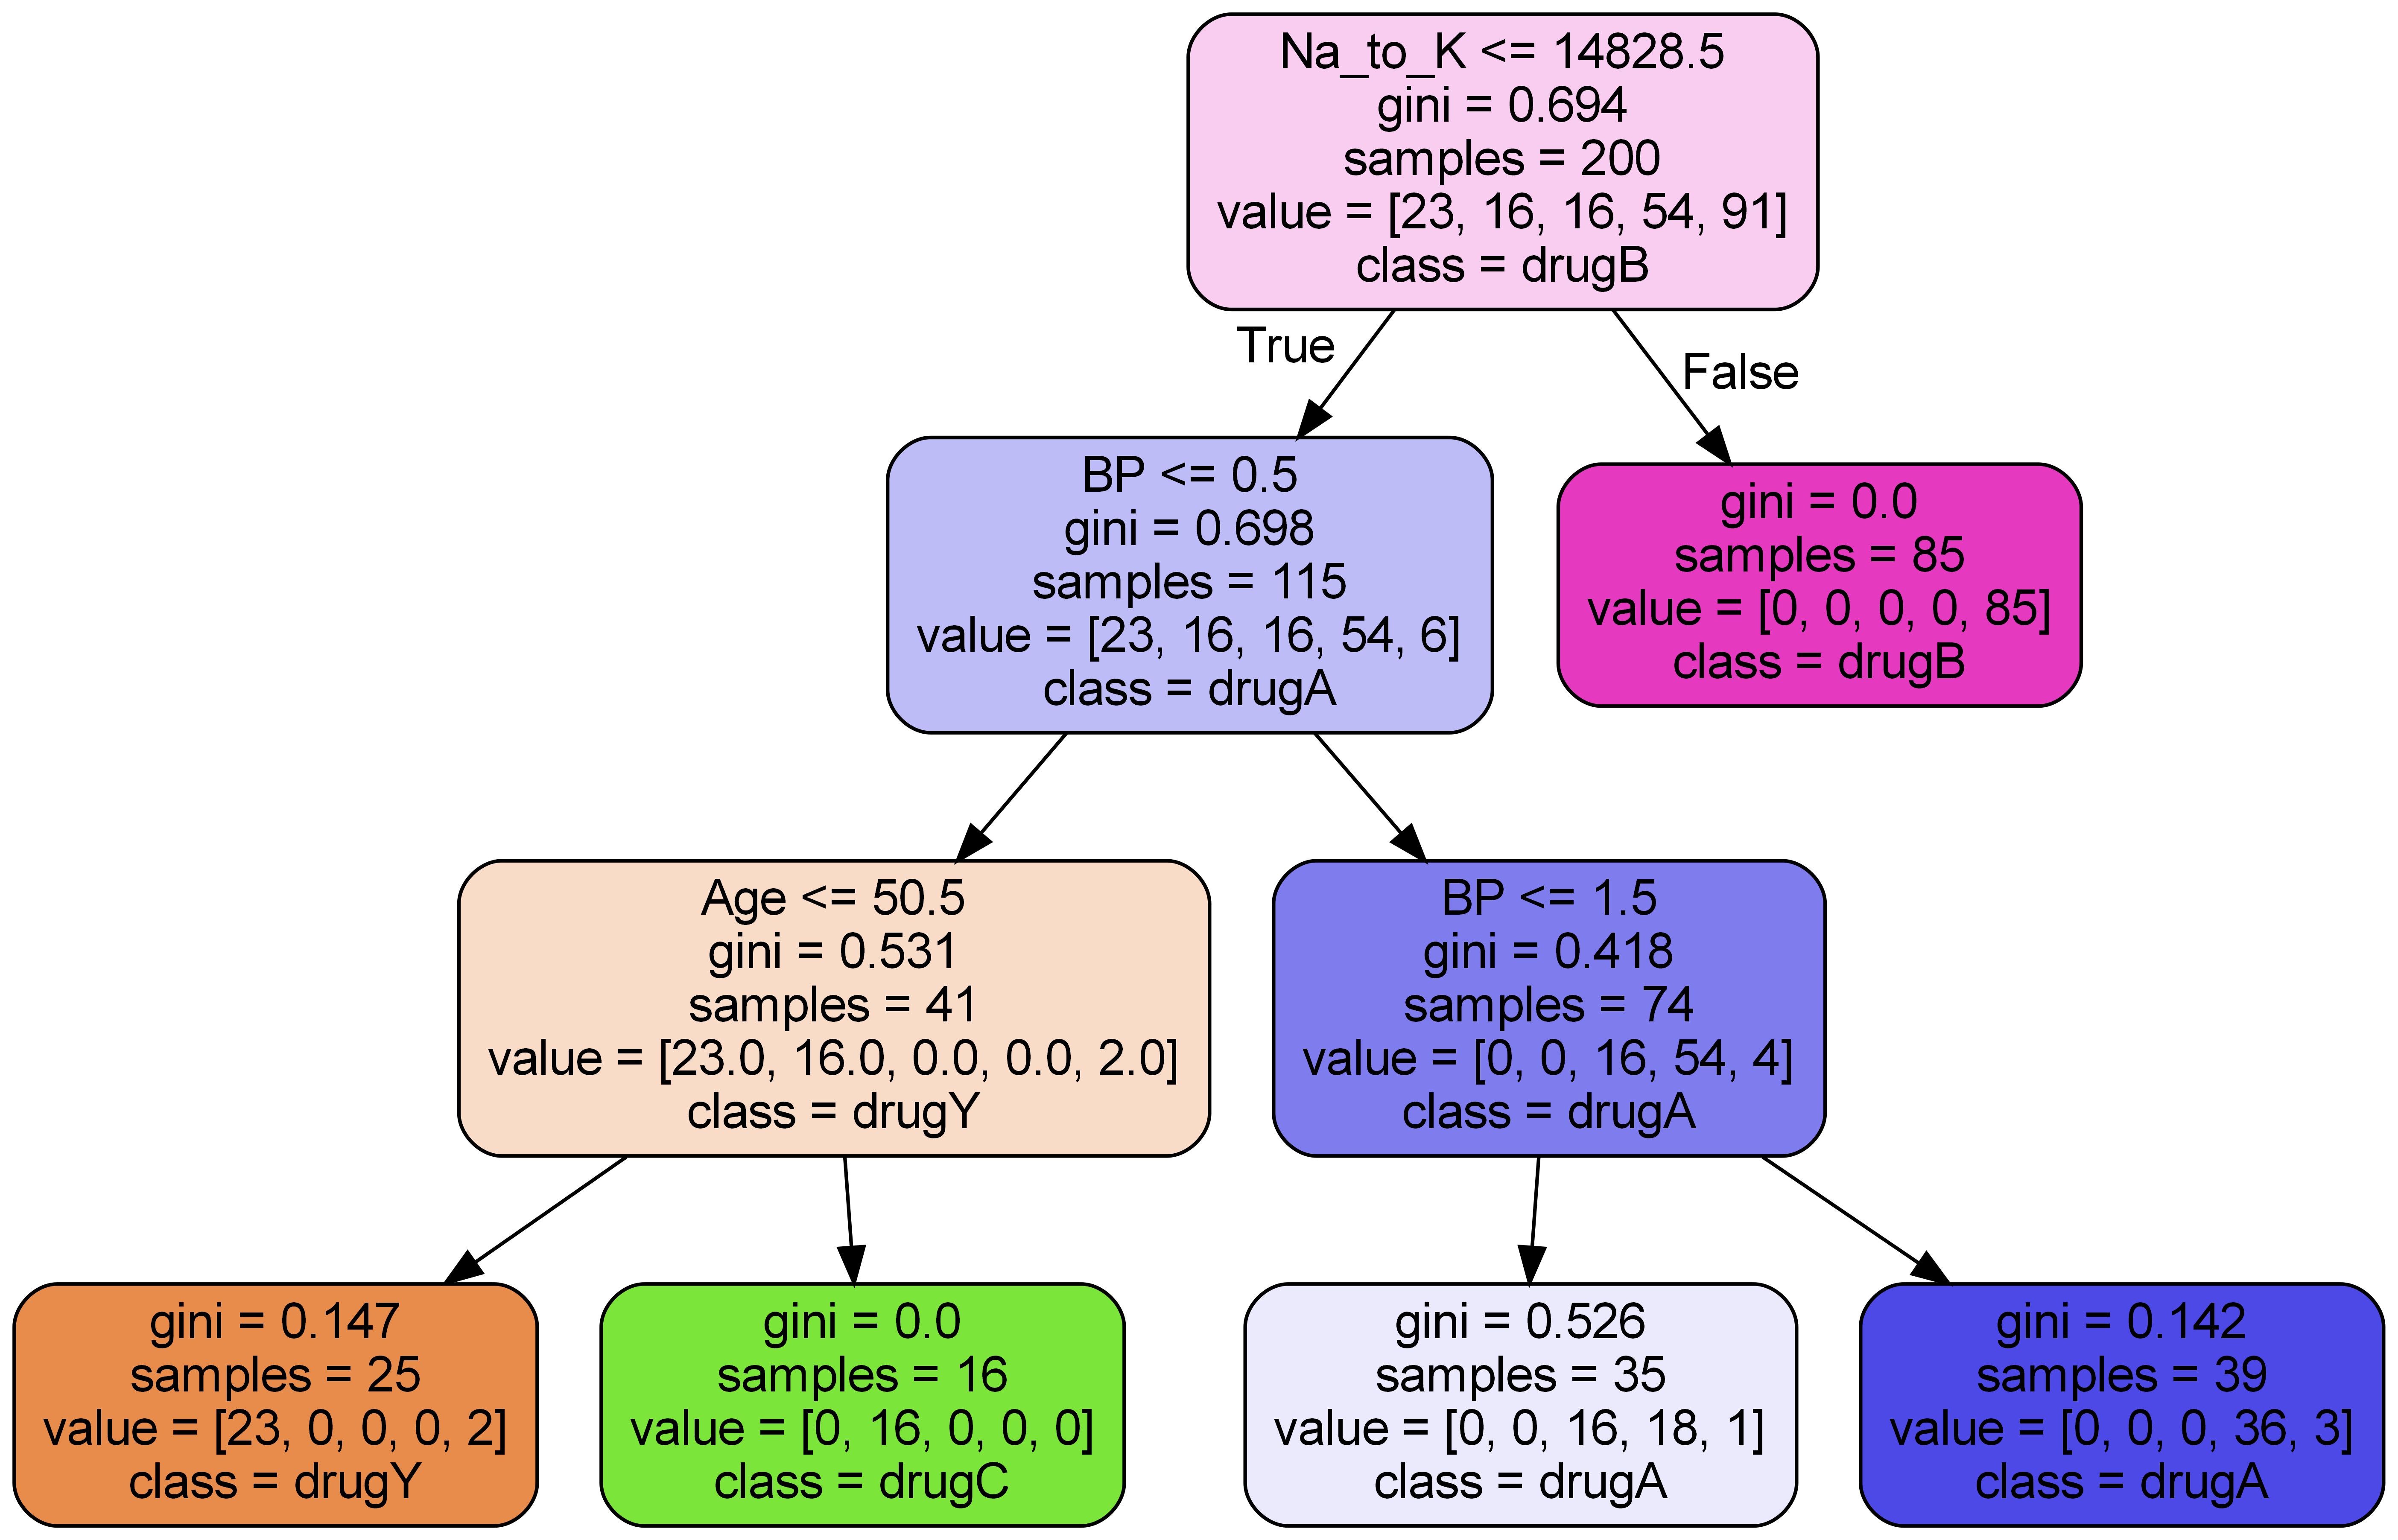

In [31]:
export_graphviz(
tree_clf_depth3,
out_file = os.path.join(PATH_FIGURAS, "arbol_clf_depth3.dot"),
feature_names = X.columns.tolist(),
class_names = le.inverse_transform(y.unique()).tolist(),
rounded = True,
filled = True
)

call(['dot', '-Tpng', 'images/arbol_clf_depth3.dot', '-o', 'images/arbol_clf_depth3.png', '-Gdpi=600'])
Image(filename = 'images/arbol_clf_depth3.png')